# Cogs 260: Advanced Neural Signal Processing

## HW1 solutions

April, 2020

The original homework is here: https://docs.google.com/document/d/1E0fKdzbURb9QoLwuwPPCAmhDFLM9dHcw5GZCr4tz-bM/edit?usp=sharing

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1a

$F_{Nyquist}=2*F_{max}=74 Hz$ 

Note that, in practice, you should really sample your signals well above the Nyquist frequency to reduce distortion. The Nyquist theorem states that as long as there are no frequency components above 37 Hz, a sampling rate of 74 Hz or higher will accurately represent the spectral (frequency) content of the signal


# 1b

Text(0, 0.5, 'x(t)')

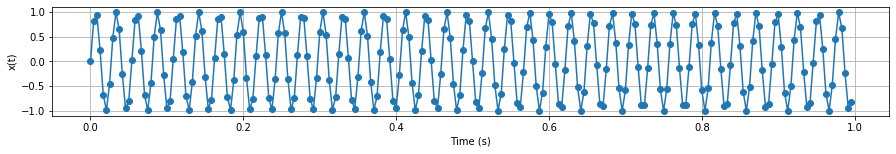

In [4]:
f=37 # Hz
Fs = 240 # Hz
Ts = 1/Fs
tvec = np.arange(0,1,Ts)

x = np.sin(2*np.pi*f*tvec + 0)

plt.figure(figsize=(15,2))
plt.plot(tvec, x,'o-')
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('x(t)')

# 1c

Now downsample the data by a factor of 2x, 3x, 4x and 8x, by simply selecting every 2nd, 3rd, 4th or 8th sample, respectively. What is the sampling frequency of the signals after downsampling?

The sampling rate after selecting every second sample is Fs=120 Hz. The other downsampling factors give Fs=80,60,30 Hz.

# 1d

Text(0.5, 0, 'Time (s)')

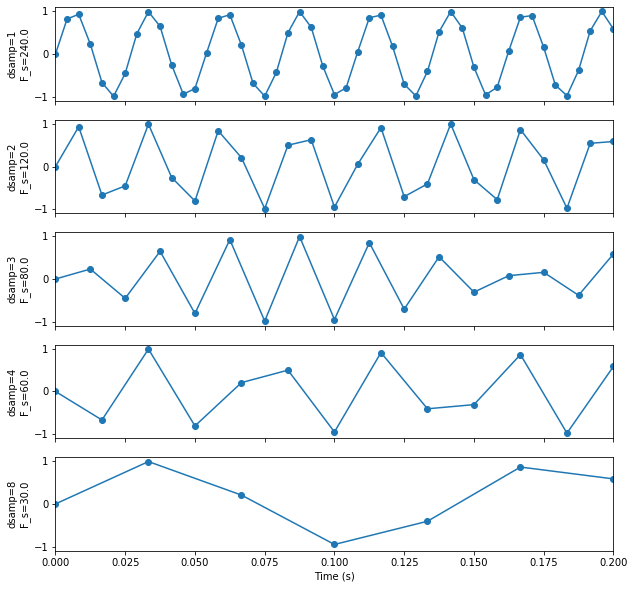

In [5]:
j=0;
fig,axs = plt.subplots(5,1, sharex=True, sharey=True,squeeze=True,figsize=(10,10))
# axs = axs.reshape(6,1).squeeze()
for dsamp in [1,2,3,4,8]:
    x_dsamp = x[::dsamp]
    t_dsamp = tvec[::dsamp]
    plt.sca(axs[j])
    plt.plot(t_dsamp, x_dsamp, 'o-')
    plt.xlim([0,0.2])
    plt.ylabel('dsamp=%d\nF_s=%3.1f' % (dsamp, Fs/dsamp))
    j+=1;
plt.xlabel('Time (s)')

# Prob 2: Simulating Kouider et al's experiment

In [6]:
import pandas as pd
# NOTE: We will need Pandas version >0.24. On datahub, you can get this
# by opening a terminal and typing:
# pip install --upgrade pandas
#

In [7]:
# Load the data using Pandas. This creates a "dataframe", that is like a spreadsheet
EEG_table = pd.read_csv('Kouider_Sim_data.csv')
EEG_table.head()

,trial_number,trial_duration,nonlinear_contrast,EEG_ 1,EEG_ 2,EEG_ 3,EEG_ 4,EEG_ 5,EEG_ 6,EEG_ 7,...,EEG_24,EEG_25,EEG_26,EEG_27,EEG_28,EEG_29,EEG_30,EEG_31,EEG_32,EEG_33
0,1,17,0,0.172430,-0.338697,0.090988,-0.021683,-0.208568,0.119196,0.207338,...,-0.132502,0.207860,-0.077744,0.450652,0.150202,-0.317031,0.790646,-0.309318,0.261042,-0.511926
1,2,17,0,0.087841,-0.131496,-0.331041,-0.081321,-0.353729,-0.311401,-0.365396,...,-0.103735,-0.850794,-0.081687,0.349423,-0.431306,-0.944125,-0.452394,-0.923529,-0.152299,-0.597112
2,3,17,0,-0.164102,-0.872653,0.560667,0.358860,-0.220609,-0.232190,0.373664,...,-0.292545,-0.137114,0.573243,0.419806,-0.229085,-0.279624,-0.142568,-0.266077,0.221358,-0.573371
3,4,17,0,0.071016,0.233536,-0.742005,-0.099792,0.674425,-0.075888,0.140803,...,0.209687,0.355578,0.149504,0.300826,0.079256,0.327811,-0.541932,-0.333924,-0.195086,-0.640673
4,5,17,0,0.415918,-0.036473,-0.364062,0.532029,-0.817601,0.041414,-0.130088,...,-0.055961,0.021161,-0.607940,-0.271499,-0.186448,-0.089366,0.426740,0.620422,-0.232879,0.616133


In [8]:
# Convert the numerical data to a simple 2D numpy array
eeg = np.array(EEG_table.iloc[:,3:])

# 2a

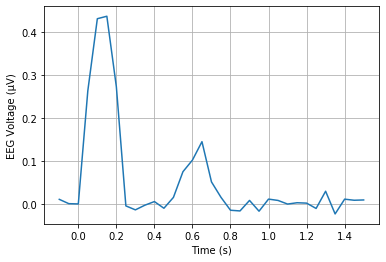

In [9]:
tvec = np.arange(-0.1,1.55,0.05)
grand_erp = eeg.mean(axis=0)
plt.plot(tvec, grand_erp)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('EEG Voltage (µV)');

# 2b

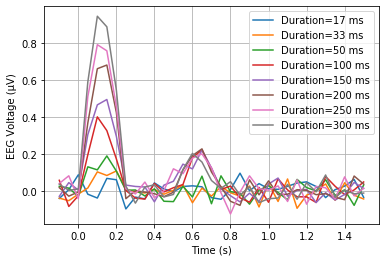

In [10]:
durations = EEG_table.trial_duration.unique()
for duration in durations:
    tvec = np.arange(-0.1,1.55,0.05)
    curr_trials = (EEG_table.trial_duration==duration)
    erp = eeg[curr_trials,:].mean(axis=0)
    plt.plot(tvec, erp,
             label='Duration=%d ms' % duration)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('EEG Voltage (µV)');
plt.legend()

# 2c

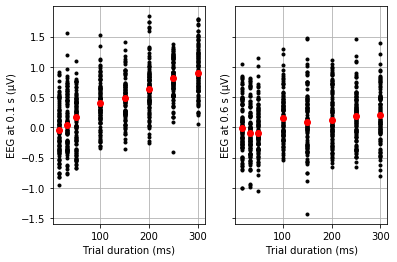

In [11]:
# First we can try making a simple scatter plot
fig,axs = plt.subplots(1,2,sharey=True,sharex=True)
j=0;
for tshow in [4,14]:
    eegu = eeg[:,tshow]
    plt.sca(axs[j])
    
    # Plot the EEG value for every trial
    plt.plot(EEG_table.trial_duration, eegu, 'k.')
    
    # Plot the median across all trials
    for dur in EEG_table.trial_duration.unique():
        plt.plot(dur, np.median(eegu[EEG_table.trial_duration==dur]), 'ro')
    plt.grid()
    plt.xlabel('Trial duration (ms)')
    plt.ylabel('EEG at %3.1f s (µV)' % tvec[tshow])
    j+=1;

Text(0.5, 0, 'Trial duration (ms)')

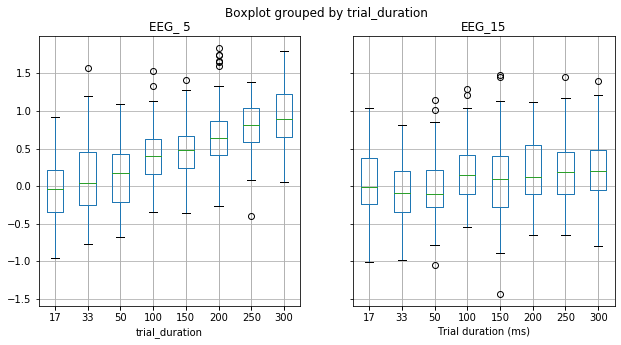

In [12]:
# Now let's try using the handy Pandas boxplot function, which
# will more clearly show the median and inter-quartile range of the
# data
j=0;
EEG_table.boxplot(column=['EEG_ 5','EEG_15'], by='trial_duration',
                 figsize=(10,5))
plt.ylabel('EEG (µV)')
plt.xlabel('Trial duration (ms)')

# 2d

In [13]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [14]:
# We need to fix the variable names that have spaces
col = EEG_table.columns
col = [c.replace(' ','') for c in col]
EEG_table.columns = col

In [16]:
# Fit a regression using the library statsmodels.formula.api.
# Note that this library automatically adds a "constant" (intercept) to the regression model
mdl = smf.ols(formula = "EEG_5 ~ 1+trial_duration+nonlinear_contrast", data=EEG_table).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  EEG_5   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     275.4
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.22e-91
Time:                        13:00:47   Log-Likelihood:                -392.58
No. Observations:                 800   AIC:                             791.2
Df Residuals:                     797   BIC:                             805.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0339      0.024     -1.397      0.163      -0.082       0.014
trial_duration         0.0029      0.000     11.525      0.000       0.002       0.003
nonlinear_contrast     0.1153      0.050      2.286      0.022       0.016       0.214
==============================================================================
Omnibus:                        4.963   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                4.901
Skew:                           0.191   Prob(JB):                       0.0863
Kurtosis:                       3.029   Cond. No.                         611.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This result shows that the trial_duration has a significant linear association (p < 0.001), while the nonlinear_contrast has only a marginal association (p = 0.022) with the EEG at 0.1 s.

In [22]:
# Fit a regression using the library statsmodels.api
# Note that this library DOES NOT add a "constant" (intercept) to the regression model. 
# Let's see how this changes the results:

# No intercept:
mdl=sm.OLS(EEG_table['EEG_5'], EEG_table[['trial_duration','nonlinear_contrast']]).fit()
print(mdl.pvalues)

# With intercept:
EEG_table['ones'] = 1
mdl=sm.OLS(EEG_table['EEG_5'], EEG_table[['ones','trial_duration','nonlinear_contrast']]).fit()
print(mdl.pvalues)

trial_duration        1.757021e-29
nonlinear_contrast    3.593025e-02
dtype: float64
ones                  1.629401e-01
trial_duration        1.560845e-28
nonlinear_contrast    2.249743e-02
dtype: float64


In [24]:
# Note that performing separate regressions for each of the two variables (trial_duration, 
# nonlinear_contrast) gives different results.
# Here, the effect of "nonlinear_contrast" seems to be highly significant, because we are not
# controlling for the linear effect (which is correlated with nonlinear_contrast)
mdl=sm.OLS(EEG_table['EEG_5'], EEG_table[['ones','trial_duration']], hasconst=False).fit()
print(mdl.pvalues)
mdl=sm.OLS(EEG_table['EEG_5'], EEG_table[['ones','nonlinear_contrast']], hasconst=False).fit()
print(mdl.pvalues)

ones              2.864680e-01
trial_duration    5.644316e-92
dtype: float64
ones                  1.329679e-02
nonlinear_contrast    2.436795e-66
dtype: float64


# 2e

In [137]:
mdl = smf.ols(formula = "EEG_15 ~ 1+trial_duration+nonlinear_contrast", data=EEG_table).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EEG_15   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     20.02
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           3.28e-09
Time:                        23:18:38   Log-Likelihood:                -453.19
No. Observations:                 800   AIC:                             912.4
Df Residuals:                     797   BIC:                             926.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0266      0.026     -1.013      0.311      -0.078       0.025
trial_duration         0.0002      0.000      0.616      0.538      -0.000       0.001
nonlinear_contrast     0.1690      0.054      3.108      0.002       0.062       0.276
==============================================================================
Omnibus:                        6.690   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.718
Skew:                           0.224   Prob(JB):                       0.0348
Kurtosis:                       2.996   Cond. No.                         611.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This result shows that the trial_duration has no significant linear association (p = 0.538), while the nonlinear_contrast has a strong association (p = 0.002) with the EEG at 0.6 s.

In [153]:
mdl.pvalues

Intercept             0.767531
trial_duration        0.434646
nonlinear_contrast    0.173432
dtype: float64

In [26]:
import statsmodels.api as sm
?sm.OLS

# 2f

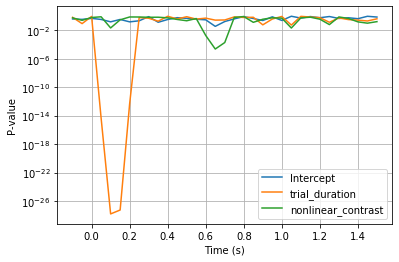

In [155]:
pvals = np.zeros((tvec.shape[0],3))
for i,c in enumerate(col[3:]):
    mdl = smf.ols(formula = c+'~ 1+trial_duration+nonlinear_contrast', data=EEG_table).fit()
    pvals[i,:] = np.array(mdl.pvalues)

plt.plot(tvec, pvals)
plt.yscale('log')
plt.xlabel('Time (s)')
plt.ylabel('P-value')
plt.legend(['Intercept','trial_duration','nonlinear_contrast'])
plt.grid()

# Review of functions and trig identities

# Prob 3

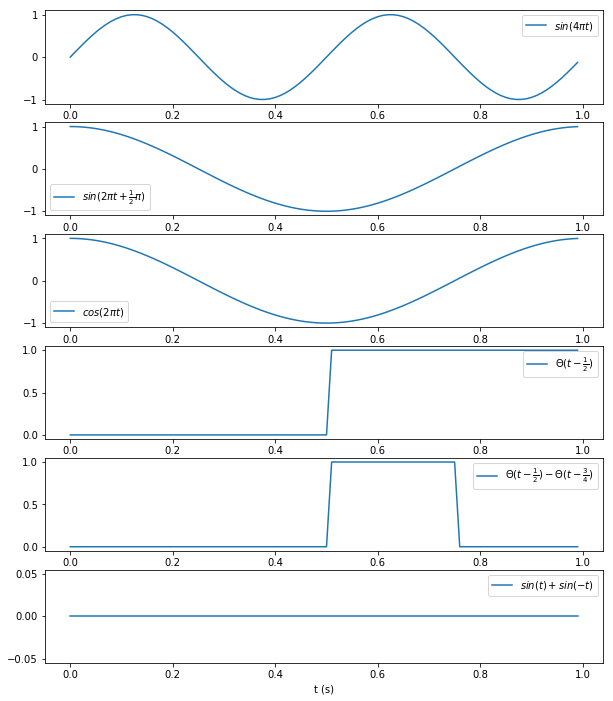

In [2]:
t = np.arange(0, 1, 0.01)
fig, axs = plt.subplots(6, 1, figsize=(10, 12))
ax = axs[0]
ax.plot(t, np.sin(4*np.pi*t), label=r"$sin(4\pi t)$") # r"" indicates a raw string
ax.legend()
ax = axs[1]
ax.plot(t, np.sin(2*np.pi*t + 0.5*np.pi), label=r"$sin(2\pi t+\frac{1}{2}\pi)$")
ax.legend()
ax = axs[2]
ax.plot(t, np.cos(2*np.pi*t), label='$cos(2\pi t)$')
ax.legend()
ax = axs[3]
ax.plot(t, np.heaviside(t-1/2, 0), label=r"$\Theta (t-\frac{1}{2})$")
ax.legend()
ax = axs[4]
ax.plot(t, np.heaviside(t-1/2, 0) -np.heaviside(t-3/4, 0) , label=r"$\Theta (t-\frac{1}{2})-\Theta (t-\frac{3}{4})$")
ax.legend()
ax = axs[5]
ax.plot(t, np.sin(t)+np.sin(-t), label=r"$sin(t)+sin(-t)$")
ax.legend()
plt.xlabel('t (s)')
plt.show()

# Prob 4

1(ii) and 1(iii) are the same.


# Prob 5
$
i. c\\
ii. b\\
iii. e\\
iv. a\\
v. d\\
vi. b/c\\
$

# Prob 6

$$e^{ia} = \cos a + i\sin a$$
$$e^{-ia} = \cos (-a) + i\sin (-a) = \cos a - i\sin a$$

i. $$ \frac{(e^{ia} + e^{-ia})}{2} = \frac{\cos a + i\sin a}{2} + \frac{\cos a - i\sin a}{2} = \frac{2\cos a}{2} = \cos a$$
   $$ \frac{(e^{ia} - e^{-ia})}{2i} = \frac{\cos a + i\sin a}{2i} - \frac{\cos a - i\sin a}{2} = \frac{2i\sin a}{2i} = \sin a$$

ii. 
\begin{align}
\sin^2 a + \cos^2 a = &  \left(\frac{e^{ia}-e^{-ia}}{2i}\right)^2 + \left(\frac{e^{ia}+e^{-ia}}{2}\right)^2 \\ 
 = & \frac{-e^{2ia}-e^{-2ia}+2}{4} + \frac{e^{2ia}+e^{-2ia}+2}{4} \\
 = & \frac{4}{4} = 1
\end{align}

iii.
\begin{align}
\sin a \cos b + \sin b \cos a = & \frac{e^{ia}-e^{-ia}}{2i} \cdot \frac{e^{ib}+e^{-ib}}{2}
                                + \frac{e^{ib}-e^{-ib}}{2i} \cdot \frac{e^{ia}+e^{-ia}}{2}\\
                              = & \frac{e^{i(a+b)} + e^{i(a-b)} - e^{i(-a+b)} - e^{i(-a-b)}}{4i}
                               + \frac{e^{i(a+b)} + e^{i(-a+b)} - e^{i(a-b)} - e^{i(-a-b)}}{4i}\\
                              = & \frac{2e^{i(a+b)}-2e^{-i(a+b)}}{2\cdot 2i} \\
                              = & \frac{e^{i(a+b)}-e^{-i(a+b)}}{2i} \\
                              = & \sin(a+b)
\end{align}

iv.
\begin{align}
\cos a \cos b - \sin a \sin b = & \frac{e^{ia}+e^{-ia}}{2} \cdot \frac{e^{ib}+e^{-ib}}{2}
                               - \frac{e^{ia}-e^{-ia}}{2i} \cdot \frac{e^{ib}-e^{-ib}}{2i}\\
                              = & \frac{e^{i(a+b)} + e^{i(a-b)} + e^{i(-a+b)} + e^{i(-a-b)}}{4}
                               + \frac{e^{i(a+b)} - e^{i(a-b)} - e^{i(-a+b)} + e^{i(-a-b)}}{4}\\
                              = & \frac{2e^{i(a+b)}+2e^{i(-a-b)}}{2\cdot 2} \\
                              = & \frac{e^{i(a+b)}+e^{-i(a+b)}}{2} \\
                              = & \cos(a+b)
\end{align}

v. 
\begin{align}
\cos(\theta + \pi/2) = &\cos(\theta) \cos(\pi/2) - \sin(\theta) \sin(\pi/2)\\
                     = &\cos(\theta)*0 - \sin(\theta)*1\\
                     = &-\sin(\theta)
\end{align}

vi. 
$$ \frac{d}{dt} \sin t = \frac{d}{dt} \frac{e^{it}-e^{-it}}{2i} = \frac{ie^{it}+ie^{-it}}{2i} = \cos t $$

vii.
\begin{align}
\frac{d}{dt} \cos(at+b) = &\frac{d}{dt} \frac{e^{i(at+b)}+e^{-i(at+b)}}{2}\\ 
                        = &\frac{iae^{i(at+b)}-iae^{-i(at+b)}}{2}\\
                        = &\frac{-ae^{i(at+b)}+ae^{-i(at+b)}}{2i} = -a\sin(at+b)
\end{align}

viii.
$$ \sin a \cos b = \frac{1}{2} [\sin(a+b) + \sin(a-b)] $$


# Prob 7

i.
$$\int_{0}^{1}\sin(2\pi t)dt = -\frac{1}{2\pi}\cos(2\pi t) \biggr\rvert_{0}^{1} =  -\frac{1}{2\pi}[\cos(2\pi)-\cos(0)] = 0$$

ii.
$$\int_{0}^{nT}\cos(\frac{2\pi}{T}t+3.84)dt = \frac{T}{2\pi}\sin(\frac{2\pi}{T}t+3.84) \biggr\rvert_{0}^{nT} =  \frac{T}{2\pi}[\sin(2n\pi+3.84)-\sin(3.84)] = 0$$

iii.
$$\int_{0}^{\pi}\sin(t)dt = -\cos(t) \biggr\rvert_{0}^{\pi} = -(\cos(\pi)-\cos(0)) = 2$$

iv.
$$\int_{0}^{1} e^{2\pi it}dt = \frac{1}{2\pi i}(e^{2\pi i}-e^0) = 0$$

v.
$$\int_{-\infty}^{\infty}\delta (t-3)(t^2+4)dt = 3^2+4 = 13$$

# Prob 8
i.
$$\sin 3\pi t = \sin 3\pi (t+T)$$
$$3\pi T = 2\pi, T = \frac{2}{3}$$

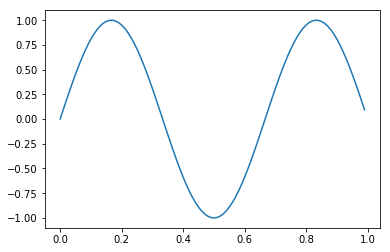

In [3]:
t = np.arange(0, 1, 0.01)
fig, ax = plt.subplots()
ax.plot(t, np.sin(3*np.pi*t))
plt.show()

ii.
$$exp(-\sin ^2 3\pi t) = exp(-\sin ^2 3\pi (t+T))$$
$$3\pi T = \pi, T = \frac{1}{3}$$

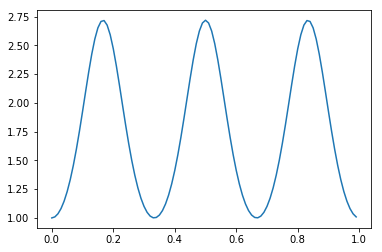

In [4]:
t = np.arange(0, 1, 0.01)
fig, ax = plt.subplots()
ax.plot(t, np.exp(np.square(np.sin(3*np.pi*t))))
plt.show()

iii. assume the period here is $T_2$
$$\sin (\frac{t}{T}+1.3) + \cos \frac{5t}{T} = \sin (\frac{t+T_2}{T}+1.3) + \cos \frac{5(t+T_2)}{T}$$
$$\frac{T_2}{T} = 2k\pi, T_2 = 2k\pi T$$
$$\frac{5T_2}{T} = 2m\pi, T_2 = \frac{2m\pi T}{5}$$
<center>$T_2 = 2\pi$ (choose k=1, m=5) 

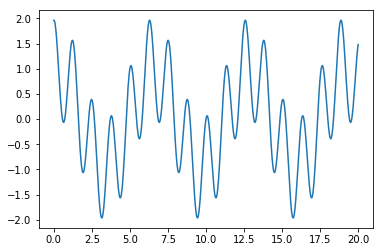

In [5]:
t = np.arange(0, 20, 0.01)
T = 1
fig, ax = plt.subplots()
ax.plot(t, np.sin(t/T+1.3)+np.cos(5*t/T))
plt.show()

-iv.
<h><center>Note that $\ln(1-x)=-\sum_{n=1}^{\infty}\frac{(x)^{n}}{n}$
\begin{align}
\sum_{n=1}^{\infty}\frac{\sin (nt)}{n} = &\sum_{n=1}^{\infty}\frac{e^{int}-e^{-int}}{2in}\\
                             = &\frac{1}{2i}[\sum_{n=1}^{\infty}\frac{(e^{it})^n}{n}-\sum_{n=1}^{\infty}\frac{(e^{-it})^n}{n}]\\
                             = &\frac{1}{2i}[-\ln(1-e^{it})+\ln(1-e^{-it}))]\\
\end{align}
<center>Since $e^{it}$ and $e^{-it}$ are periodic functions with period 2$\pi$,
$\sum_{n=1}^{\infty}\frac{\sin (nt)}{n}$ is a periodic functions with period 2$\pi$</center>

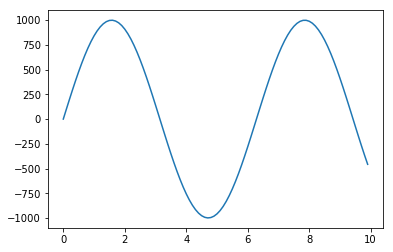

In [6]:
t = np.arange(0,10,0.1)
sum1=np.zeros(len(t))
i=-1
for m in t:
    i=i+1
    for n in range(1,1000):
        sum1[i]=sum1[i] + np.sin(n*m/n)
 
fig, ax = plt.subplots()
ax.plot(t, sum1)
plt.show()    

v.
$$\sin(1/t)=\sin(1/(t+T))$$
$$\frac{1}{t} = \frac{1}{t+T}+2\pi$$ 
$$T = -\frac{2\pi t^2}{1-2\pi t} \neq const$$
<center>$sin(1/t)$ is not a periodic fuction


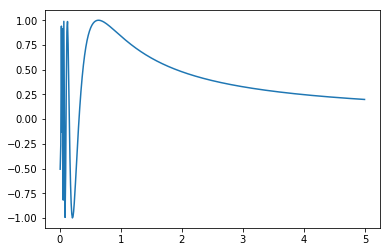

In [7]:
t = np.arange(0.01, 5, 0.01)
fig, ax = plt.subplots()
ax.plot(t, np.sin(1/t))
plt.show()

vi.
$$\sin(2t) + \sin(\pi t) = \sin(2(t+T))+ \sin(\pi(t+T))$$
$$2T = 2k\pi$$
$$\pi T= 2m\pi$$
<center>$T=k\pi=2m$, no integer k,m satisfies, so $\sin(2t) + \sin(\pi t)$ is not a periodic function

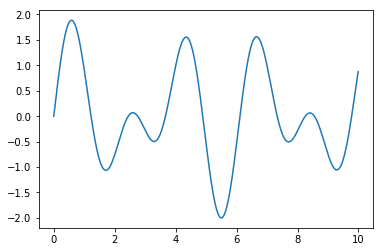

In [8]:
t = np.arange(0, 10, 0.01)
fig, ax = plt.subplots()
ax.plot(t, np.sin(2*t)+np.sin(np.pi*t))
plt.show()


# Prob 9

i.
$x[n]=f(nT_s)=cos(\omega n T_s)$

ii
Periodic: $\omega nT_s + \omega T = \omega mT_s$, m is a positive integer bigger than n, $T=\frac{2\pi}{\omega}$  
$T_s=\frac{2\pi}{(m-n)\omega} =\frac{2\pi}{k\omega}$, k is any positive integer